In [1]:
# Import Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Initial data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# What are the trends of in-demand skills like for Data Analysts? 

In [4]:
# Filter for US and MY data analysts
df_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_my = df[(df['job_country'] == 'Malaysia') & (df['job_title_short'] == 'Data Analyst')].copy()

## US Data

In [66]:
df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin...",6
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p...",8
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']...",9
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']},10
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",7
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1


In [69]:
# Extract month from date column
df_us['job_posted_month_no'] = df_us['job_posted_date'].dt.month

In [70]:
# Explode skills list into individual rows
df_us_explode = df_us.explode('job_skills').copy()

In [71]:
# Create pivot table for skills count for each month
df_uspivot = df_us_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

In [72]:
# Sort column based on total count for each skill
# Create a new row index for summing up skills
df_uspivot.loc['Total'] = df_uspivot.sum()

# Sort highest to lowest of skill
df_uspivot = df_uspivot[df_uspivot.loc['Total'].sort_values(ascending = False).index]

# Drop total row
df_uspivot.drop('Total', inplace = True)

In [73]:
# Transforming counts into percentage relative to all DA job posting
# Find total US job posting for each month
us_da_posting = df_us.groupby('job_posted_month_no').size()

# Create the percentage by dividing the table values with other df/series/dict
df_usperc = df_uspivot.div(us_da_posting/100, axis = 0)

In [74]:
# Change month num into name
df_usperc = df_usperc.reset_index()
df_usperc['job_posted_month'] = df_usperc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format ='%m').strftime('%b'))
df_usperc = df_usperc.set_index('job_posted_month')
df_usperc = df_usperc.drop(columns='job_posted_month_no')

df_usperc

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


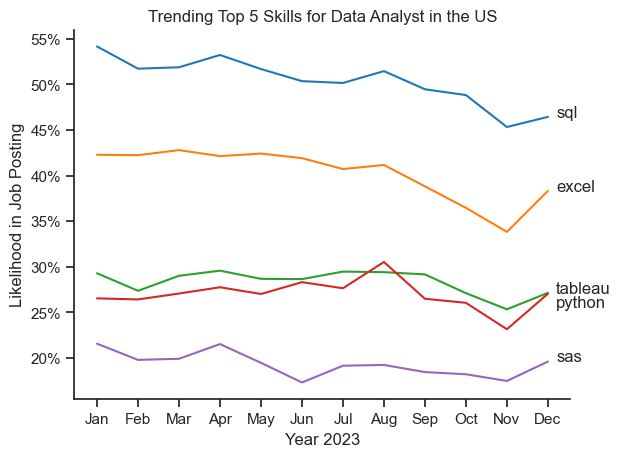

In [95]:
# Plotting 
df_usplot = df_usperc.iloc[:, :5] # All the rows, and first 5 columns

sns.set_theme(style='ticks')
sns.lineplot(df_usplot, dashes = False, palette = 'tab10', legend = False)
sns.despine()


# Customization
plt.title('Trending Top 5 Skills for Data Analyst in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('Year 2023')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals = 0))

for i in range(5):
    # Calculate y position for the text label
    y_position = df_usplot.iloc[-1, i]  # Get the y position for the current skill
    # Adjust the y position for Python to be slightly lower than Tableau
    if df_usplot.columns[i] == 'python':
        y_position -= 1.5  # Adjust the y position down for Python
    
    plt.text(11.2, y_position, df_usplot.columns[i])

# MY data

Investigate through Malaysia-filtered data

In [96]:
df_my

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
328,Data Analyst,Finance Data Analyst,"Sepang, Selangor, Malaysia",via Trabajo.org,Full-time,False,Malaysia,2023-07-14 13:11:55,True,False,Malaysia,None,NaN,NaN,AirAsia,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
1397,Data Analyst,Transfer Pricing Data Analyst,Malaysia,via BeBee Malaysia,Full-time,False,Malaysia,2023-08-18 13:29:59,False,False,Malaysia,None,NaN,NaN,KPMG PLT,"[sql, python, aws, gcp, azure, power bi, alter...","{'analyst_tools': ['power bi', 'alteryx', 'sap..."
1510,Data Analyst,Data Test Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-05-06 14:15:47,True,False,Malaysia,None,NaN,NaN,Agensi Pekerjaan BTC Sdn Bhd,"[sql, aws, azure, selenium, linux]","{'cloud': ['aws', 'azure'], 'libraries': ['sel..."
1568,Data Analyst,Metocean Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-07-10 13:10:20,False,False,Malaysia,None,NaN,NaN,Fugro,[python],{'programming': ['python']}
1861,Data Analyst,Reference Data Analyst - Client Account Services,Malaysia,via Jooble,Full-time,False,Malaysia,2023-09-10 13:24:16,False,False,Malaysia,None,NaN,NaN,JP Morgan Chase & Co.,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784964,Data Analyst,Junior Data Analyst,"Petaling Jaya, Selangor, Malaysia",via BeBee Malaysia,Full-time,False,Malaysia,2023-11-16 06:22:31,False,False,Malaysia,None,NaN,NaN,Hexamatics Servvcom,None,None
785209,Data Analyst,Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-11-22 07:05:45,True,False,Malaysia,None,NaN,NaN,Quacquarelli Symonds,"[r, python, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
785218,Data Analyst,Data Administration Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time and Temp work,False,Malaysia,2023-11-17 06:20:50,False,False,Malaysia,None,NaN,NaN,PERSOLKELLY_RHQ,"[windows, flow]","{'os': ['windows'], 'other': ['flow']}"
785341,Data Analyst,Data Analyst Clerk,"Petaling Jaya, Selangor, Malaysia",via Trabajo.org,Full-time,False,Malaysia,2023-11-23 06:24:44,False,False,Malaysia,None,NaN,NaN,Advanced Agriecological Research Sdn Bhd,"[word, excel, powerpoint]","{'analyst_tools': ['word', 'excel', 'powerpoin..."


In [97]:
# Extract month from date column
df_my['job_posted_month_no'] = df_my['job_posted_date'].dt.month

# Explode skills list into individual rows
df_my_explode = df_my.explode('job_skills').copy()

# Create pivot table for skills count for each month
df_mypivot = df_my_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

In [98]:
# Sort column based on total count for each skill
# Create a new row index for summing up skills
df_mypivot.loc['Total'] = df_mypivot.sum()

# Sort highest to lowest of skill
df_mypivot = df_mypivot[df_mypivot.loc['Total'].sort_values(ascending = False).index]

# Drop total row
df_mypivot.drop('Total', inplace = True)

In [99]:
# Transforming counts into percentage relative to all DA job posting
# Find total MY job posting for each month
my_da_posting = df_my.groupby('job_posted_month_no').size()

# Create the percentage by dividing the table values with other df/series/dict
df_myperc = df_mypivot.div(my_da_posting/100, axis = 0)

In [100]:
# Change month num into name
df_myperc = df_myperc.reset_index()
df_myperc['job_posted_month'] = df_myperc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format ='%m').strftime('%b'))
df_myperc = df_myperc.set_index('job_posted_month')
df_myperc = df_myperc.drop(columns='job_posted_month_no')

df_myperc

job_skills,sql,excel,python,tableau,power bi,sas,r,sap,powerpoint,word,...,mongo,powerbi,laravel,powershell,slack,ibm cloud,airtable,rshiny,rust,no-sql
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,36.554622,41.596639,21.008403,20.168067,19.327731,22.689076,9.243697,9.663866,8.403361,6.722689,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.420168,0.00000,0.000000,0.000000
Feb,36.871508,36.871508,25.139665,22.905028,20.670391,21.229050,14.525140,12.849162,11.731844,6.145251,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Mar,50.000000,47.169811,28.301887,26.886792,23.584906,18.867925,14.150943,12.735849,9.905660,7.547170,...,0.00000,0.00000,0.000000,0.000000,0.471698,0.000000,0.000000,0.00000,0.000000,0.000000
Apr,40.101523,38.578680,24.873096,17.258883,21.827411,15.228426,16.243655,13.705584,5.583756,3.553299,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.507614,0.000000,0.00000,0.000000,0.000000
May,46.413502,41.772152,35.021097,20.675105,18.143460,16.877637,13.502110,9.282700,8.860759,9.704641,...,0.00000,0.00000,0.000000,0.421941,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Jun,51.091703,43.231441,37.117904,22.707424,19.213974,11.353712,16.157205,11.353712,5.240175,4.803493,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.436681,0.436681
Jul,48.947368,34.736842,36.842105,18.421053,22.631579,11.578947,14.210526,10.000000,8.421053,6.315789,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Aug,50.476190,46.666667,33.809524,29.523810,22.857143,14.285714,17.619048,10.952381,7.619048,8.095238,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Sep,41.447368,35.526316,26.315789,28.289474,21.052632,10.526316,11.184211,7.236842,3.947368,3.947368,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


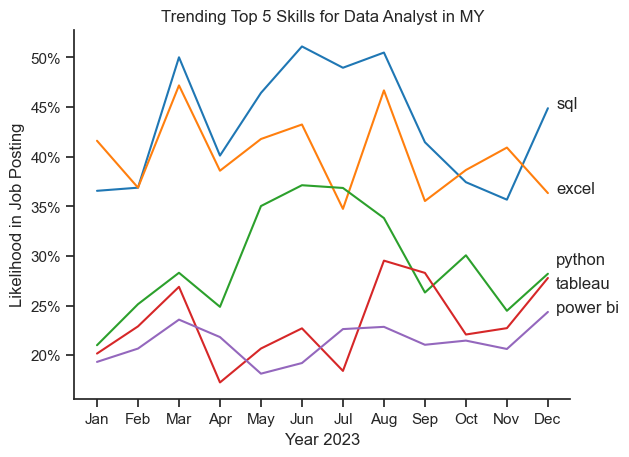

In [109]:
# Plotting 
df_myplot = df_myperc.iloc[:, :5] # All the rows, and first 5 columns

sns.set_theme(style='ticks')
sns.lineplot(df_myplot, dashes = False, palette = 'tab10', legend = False)
sns.despine()


# Customization
plt.title('Trending Top 5 Skills for Data Analyst in MY')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('Year 2023')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals = 0))

for i in range(5):
    # Calculate y position for the text label
    y_position = df_myplot.iloc[-1, i]  # Get the y position for the current skill
    # Adjust the y position for Tableau to be slightly lower than Python
    if df_myplot.columns[i] == 'tableau':
        y_position -= 1  # Adjust the y position down for Tableau
    if df_myplot.columns[i] == 'python':
        y_position += 1
    
    plt.text(11.2, y_position, df_myplot.columns[i])